# Final Project Proposal

### Author: Joseph Wong

## Package Imports

In [1]:
# ============================================================
# Basic packages
# ============================================================
import os                             # For file and directory operations
import numpy as np                    # For numerical computing and arrays
import pandas as pd                   # For data manipulation and analysis

# ============================================================
# Visualization packages
# ============================================================
import matplotlib.pyplot as plt        # Static 2D plotting
from matplotlib.colors import ListedColormap
import seaborn as sns                  # Statistical data visualization built on matplotlib

# Interactive visualization with Plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'colab'        # Set renderer for interactive output in Colab or notebooks

# ============================================================
# Scikit-learn: Core utilities for model building and evaluation
# ============================================================
from sklearn.model_selection import train_test_split    # Train/test data splitting
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler  # Feature transformations and scaling
from sklearn.metrics import (                            # Model evaluation metrics
    mean_squared_error, r2_score, accuracy_score, 
    precision_score, recall_score, confusion_matrix, 
    classification_report
)

# ============================================================
# Scikit-learn: Linear and polynomial models
# ============================================================
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor       # For KNN

# ============================================================
# Scikit-learn: Synthetic dataset generators
# ============================================================
from sklearn.datasets import make_classification, make_regression

# ============================================================
# Scikit-learn: Naive Bayes models
# ============================================================
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# ============================================================
# Scikit-learn: Text feature extraction
# ============================================================
from sklearn.feature_extraction.text import CountVectorizer

# ============================================================
# Scikit-learn: Decision Trees
# ============================================================
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Introduction and Background

In this project, I will explore various factors and their potential correlations with age of death. Mortality is a relevant issue to all of humanity. Analyzing personal attributes and lifestyle choices in relation to age of death will hopefully illuminate patterns that may help prevent younger death. My overall goal for this project is to find factors that correlate with age of death and determine which are most effective to predict age of death using machine learning models.

## Description of the data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joannpineda/individual-age-of-death-and-related-factors")

print("Path to dataset files:", path)

file = path + '/' + os.listdir(path)[0]
df = pd.read_json(file)
df.head()

Path to dataset files: C:\Users\josee\.cache\kagglehub\datasets\joannpineda\individual-age-of-death-and-related-factors\versions\2


,age,weight,sex,height,sys_bp,smoker,nic_other,num_meds,occup_danger,ls_danger,...,addiction,major_surgery_num,diabetes,hds,cholesterol,asthma,immune_defic,family_cancer,family_heart_disease,family_cholesterol
0,100,219,m,74,136,n,n,0,1,1,...,n,0,n,y,203,n,n,y,n,y
1,66,242,m,73,111,n,n,0,1,1,...,y,0,n,n,228,n,n,n,n,n
2,31,197,f,65,112,n,n,7,1,2,...,y,3,n,y,183,n,n,n,n,n
3,42,244,f,69,127,n,n,1,2,3,...,n,2,n,y,228,n,n,n,n,n
4,93,183,f,63,91,y,n,2,3,3,...,y,2,n,n,169,n,n,n,n,n


The data is sourced from Joann Pineda on Kaggle (*https://www.kaggle.com/datasets/joannpineda/individual-age-of-death-and-related-factors*). It is under an Apache 2.0 license and is freely available to the public. It is important to note that it is not specified when the data was collected or from what location it was collected from. Certain regions may be misrepresented, so we will be cautious about what conclusions we draw.

## Initial Exploratory Data Analysis

### Data Basics

In [3]:
df.shape

(10000, 24)

There are 10,000 observations and 24 variables.

In [4]:
df['major_surgery_num']

0       0
1       0
2       3
3       2
4       2
       ..
9995    3
9996    3
9997    5
9998    2
9999    7
Name: major_surgery_num, Length: 10000, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   10000 non-null  int64 
 1   weight                10000 non-null  int64 
 2   sex                   10000 non-null  object
 3   height                10000 non-null  int64 
 4   sys_bp                10000 non-null  int64 
 5   smoker                10000 non-null  object
 6   nic_other             10000 non-null  object
 7   num_meds              10000 non-null  int64 
 8   occup_danger          10000 non-null  int64 
 9   ls_danger             10000 non-null  int64 
 10  cannabis              10000 non-null  object
 11  opioids               10000 non-null  object
 12  other_drugs           10000 non-null  object
 13  drinks_aweek          10000 non-null  int64 
 14  addiction             10000 non-null  object
 15  major_surgery_num     10000 non-null 

There are no NaN values in the dataset.

**Variables**

**Numerical**
- **'age' (int):** age at death
- **'weight' (int):** in lbs
- **'height' (int):** in inches
- **'sys_bp' (int):** systolic blood pressure
- **'num_meds' (int):**
- **'drinks_aweek' (int):**
- **'major_surgery_num' (int):**
- **'cholesterol' (int):** in mg/dL

**Categorical**
- **'sex' (object):** male/female
- **'smoker' (object):** yes/no
- **'nic_other' (object):** yes/no
- **'occup_danger' (int):** occupation danger (1/2/3; low, medium, high)
- **'ls_danger' (int):** lifestyle danger (1/2/3; low, medium, high)
- **'cannabis' (object):** yes/no
- **'opioids' (object):** yes/no
- **'other_drugs' (object):** yes/no
- **'addiction' (object):** yes/no
- **'diabetes' (object):** yes/no
- **'hds' (object):** yes/no (heart disease or stroke)
- **'asthma' (object):** yes/no
- **'immune_defic' (object):** immunodeficient (yes/no)
- **'family_cancer' (object):** yes/no
- **'family_heart_disease' (object):** yes/no
- **'family_cholesterol' (object):** yes/no

'num_meds' and 'addiction' do not have clear descriptions, so we will drop those variable. Also, 'occup_danger' and 'ls_danger' are integer values but represent categorical data. So, we will convert their values to strings.

In [6]:
df.drop(['num_meds','addiction'], axis=1, inplace=True)

In [7]:
df[['occup_danger','ls_danger']] = df[['occup_danger','ls_danger']].replace({
    1: 'low',
    2: 'medium',
    3: 'high'
})

### Data Distribution

In [8]:
df.describe()

,age,weight,height,sys_bp,drinks_aweek,major_surgery_num,cholesterol
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,64.63570,214.725500,67.237100,126.482400,9.983400,4.170900,199.736100
std,23.19368,35.624989,3.897127,14.279162,5.556601,2.964013,35.633212
min,25.00000,97.000000,53.000000,67.000000,0.000000,0.000000,83.000000
25%,46.00000,190.000000,64.000000,117.000000,6.000000,2.000000,175.000000
50%,64.00000,214.000000,67.000000,126.000000,9.000000,4.000000,199.000000
75%,82.00000,238.000000,70.000000,136.000000,13.000000,6.000000,223.000000
max,120.00000,366.000000,82.000000,180.000000,37.000000,16.000000,351.000000


The mean is close to the median for the numerical variables, which suggests there are not significant outliers. We should note that age of death ranges from 25 to 120, so conclusions may not be fully applicable to individuals younger than 25. The median weight is 214 lbs and the median height is 67 inches (5' 7'').

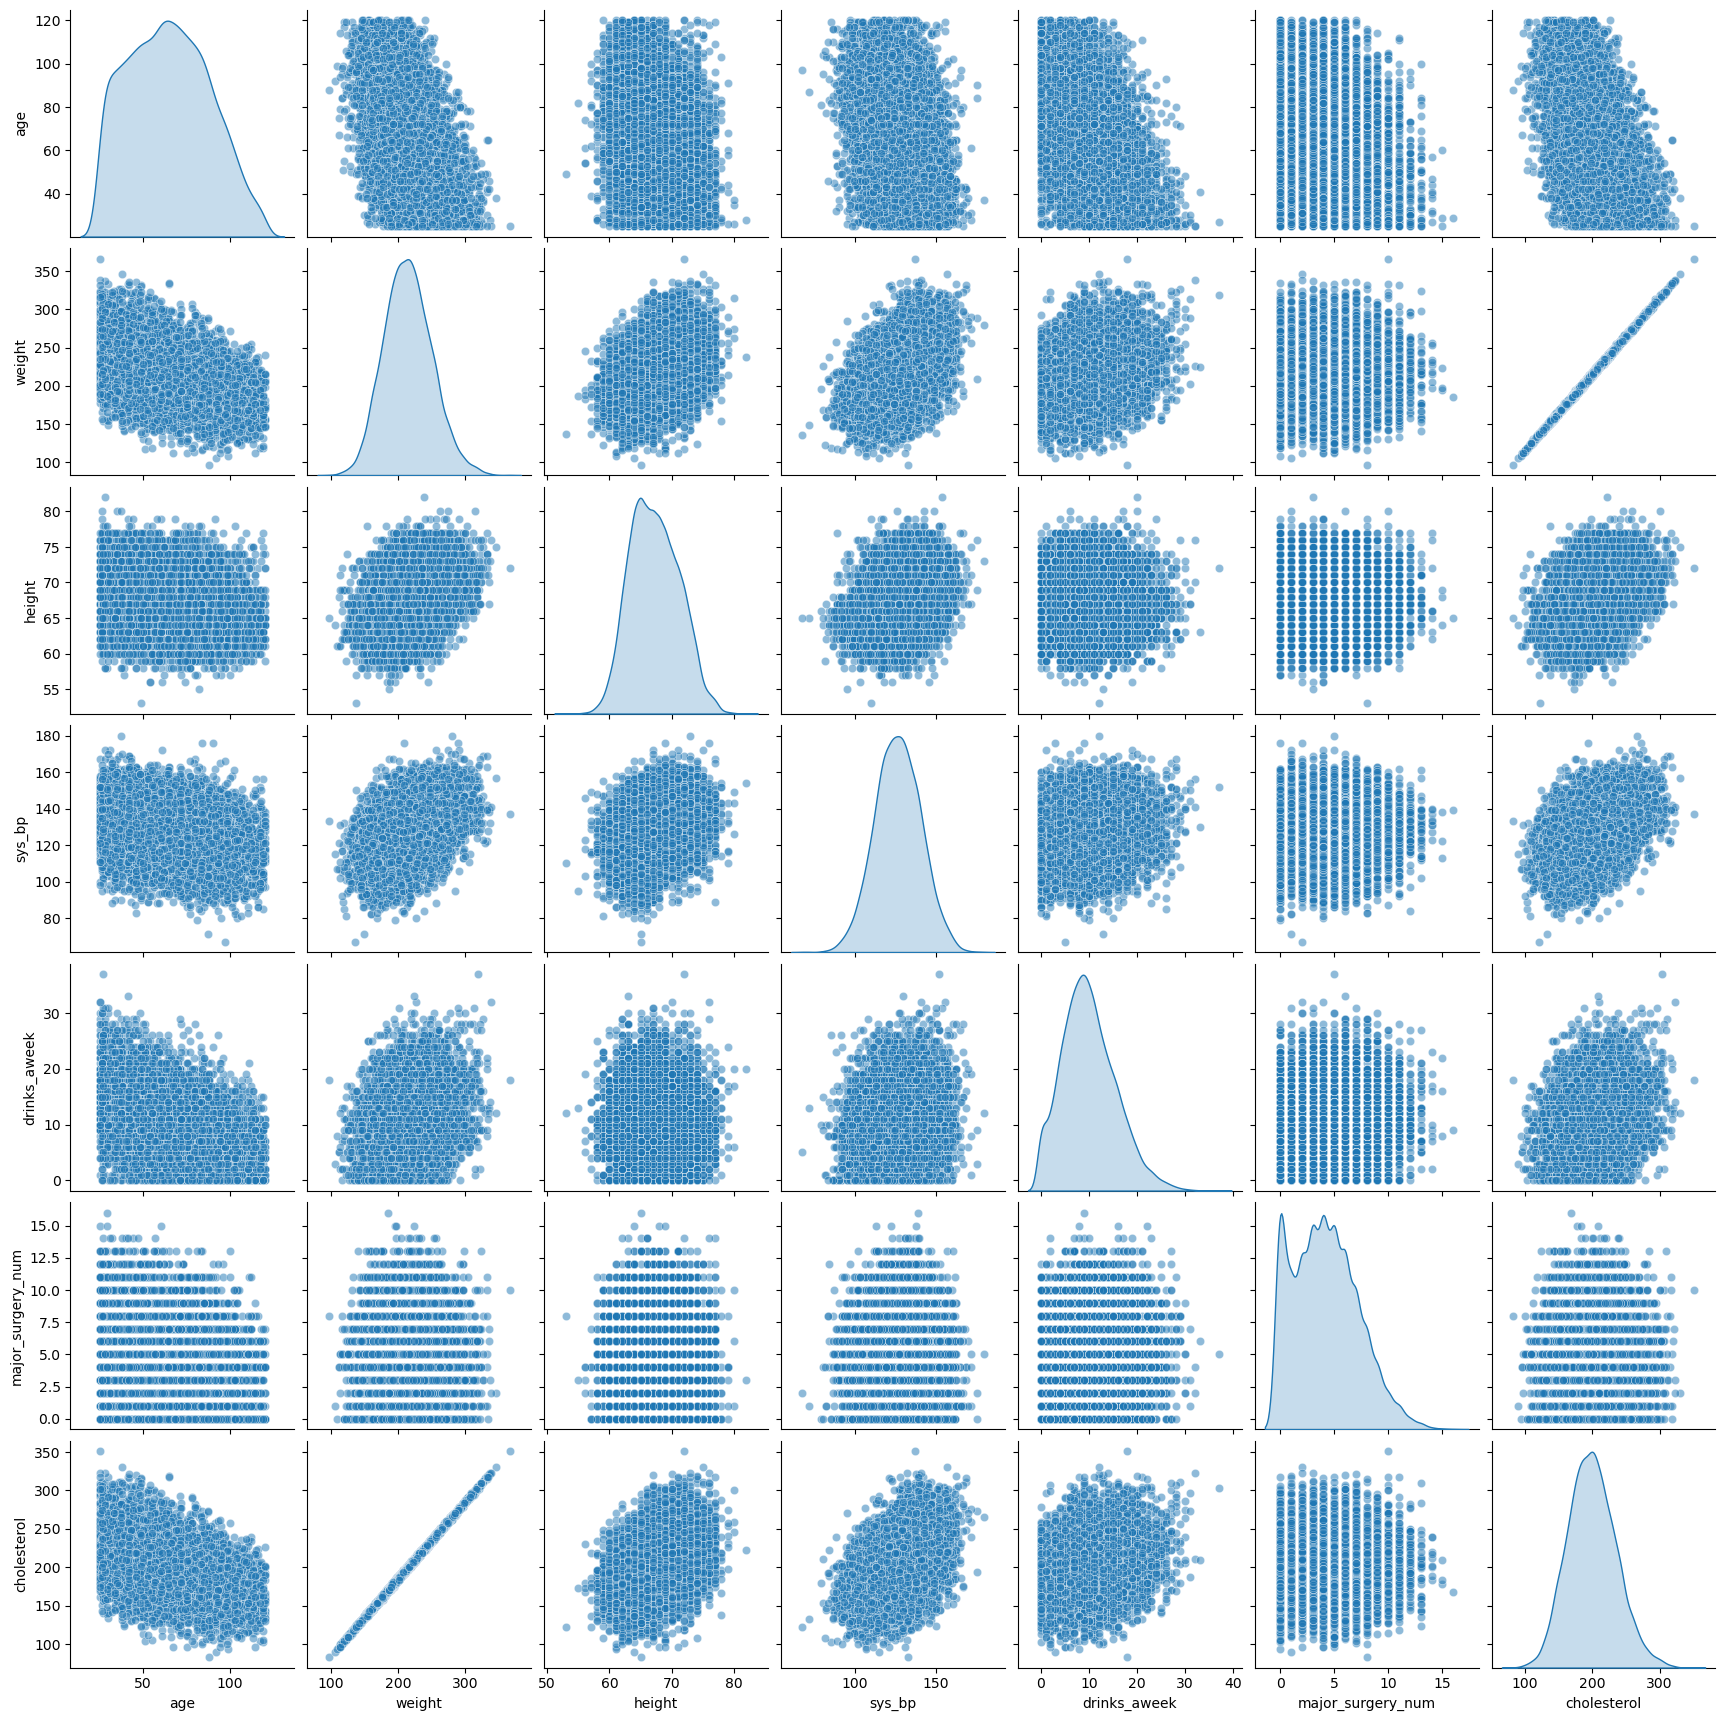

In [9]:
sns.pairplot(df, diag_kind="kde", plot_kws={"alpha": 0.5})
plt.show()

The pairplot of numerical variables reveals that the variable distributions are fairly normal with some skewedness. But, the number of major surjeries appears to have two peaks. Most relationships between variables do not appear to have strong relationships, except for weight and height which seem to be strongly linear to each other. Out of the numerical features, weight, number of drinks a week, and cholesterol have potentially negative correlations with age of death. That is, as they increase, the age of death tends to decrease.

In [10]:
cat_cols = df.select_dtypes(include=['object']).keys()
for col in cat_cols:
    print(df[col].value_counts())
    print("--------------------------------------")

sex
f    5034
m    4966
Name: count, dtype: int64
--------------------------------------
smoker
n    7994
y    2006
Name: count, dtype: int64
--------------------------------------
nic_other
n    7975
y    2025
Name: count, dtype: int64
--------------------------------------
occup_danger
low       3373
high      3341
medium    3286
Name: count, dtype: int64
--------------------------------------
ls_danger
high      3362
medium    3332
low       3306
Name: count, dtype: int64
--------------------------------------
cannabis
n    9729
y     271
Name: count, dtype: int64
--------------------------------------
opioids
n    9581
y     419
Name: count, dtype: int64
--------------------------------------
other_drugs
n    9595
y     405
Name: count, dtype: int64
--------------------------------------
diabetes
n    8928
y    1072
Name: count, dtype: int64
--------------------------------------
hds
n    5348
y    4652
Name: count, dtype: int64
--------------------------------------
asthma
n    92

Sex, occupational danger, lifestyle danger, heart disease or stroke appear to be fairly balanced in number of observations.

Smoking, nicotine/other substances, cannabis, opioids, other drugs, diabetes, asthma, immunodeficiency, family history of cancer, family history of heart disease, and family history of cholesterol issues have a greater number of "no" responses compared to "yes" responses. Cannabis, opioids, other drugs, asthma, and immunodeficiency have an alarming amount of unbalanced data so we will drop their columns.

In [11]:
df.drop(['cannabis', 'opioids', 'other_drugs', 'asthma', 'immune_defic'], axis=1, inplace=True)

### Initial Analysis

In [12]:
cat_cols = df.select_dtypes(include=['object']).keys()
for col in cat_cols:
    fig = px.histogram(df,'age',facet_col=col,color=col,title="Age of death by " + col)
    fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
    fig.show()

From the graphs, it appears that the following categories appear to have younger ages of death compared to the other categories: men, smokers, nicotine/other substance users, individuals with high occupational danger, individuals with high lifestyle danger, and individuals with heart disease or stroke. Some categories have slightly younger ages of death, such as history family cancer, heart disease, or cholesterol issues. The age of death seems to be around the same whether the individual has diabetes or not.

## Proposal for further study

I would like to verify the potential correlations between some categories and age of death by using them as features in a model, then testing the model's predictive ability. After that, I want to evaluate which features are most influential in the model. This will help me determine which variables have stronger correlations with age of death. On a small scale, findings from the study could be utilized to inform my local community about risk factors for death and what habits to avoid. Furthermore, I hope that the conclusions made from my study could be utilized on a broader scale. Focusing educational and medical efforts on variables that are found to be strongly tied to younger ages of death could help increase the ages of death.